<a href="https://colab.research.google.com/github/othrif/DataInsights/blob/master/DataCamp/WorldDevIndicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Development Indicator Analysis
The primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates

https://datacatalog.worldbank.org/dataset/world-development-indicators

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

### Load data in chunks using Pandas

In [0]:
datapath='https://raw.githubusercontent.com/othrif/DataInsights/master/DataCamp/datasets/world_ind_pop_data.csv'
df_reader = pd.read_csv(datapath,chunksize=10)

In [19]:
print(next(df_reader))
print(next(df_reader))

                                 CountryName  ... Urban population (% of total)
0                                 Arab World  ...                     31.285384
1                     Caribbean small states  ...                     31.597490
2             Central Europe and the Baltics  ...                     44.507921
3    East Asia & Pacific (all income levels)  ...                     22.471132
4      East Asia & Pacific (developing only)  ...                     16.917679
5                                  Euro area  ...                     62.096947
6  Europe & Central Asia (all income levels)  ...                     55.378977
7    Europe & Central Asia (developing only)  ...                     38.066129
8                             European Union  ...                     61.212898
9   Fragile and conflict affected situations  ...                     17.891972

[10 rows x 5 columns]
                                      CountryName  ... Urban population (% of total)
10         H

### Load a small fraction of data to look at

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


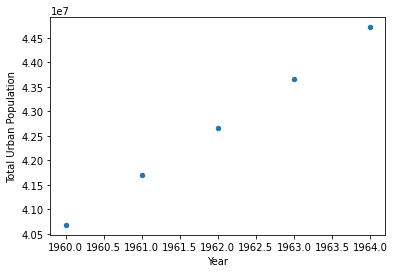

In [30]:
urb_pop_reader = pd.read_csv(datapath, chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(el1*el2/100) for el1,el2 in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

### Define function and load all data in chunks

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


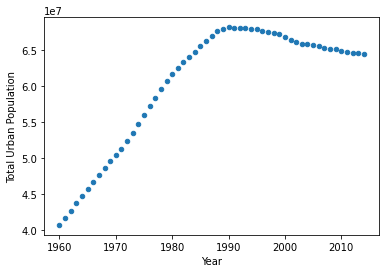

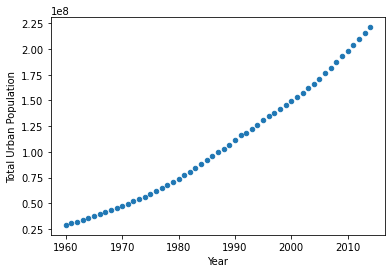

In [32]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Call plot_pop for country code 'CEB'
plot_pop(datapath,'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(datapath,'ARB')
